### Loan prediction -It is a loan approval prediction model based on the customer infermation

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("data/Loan prediction.csv")  # loading the data

In [5]:
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [6]:
data.shape

(614, 13)

In [7]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
data.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

mapping the Target Variable


In [9]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1 , 'N':0})


In [10]:
data.dtypes['Loan_Status']

dtype('int64')

# EDA

 PLOTTING OF CATEGORICAL VALUES


In [11]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

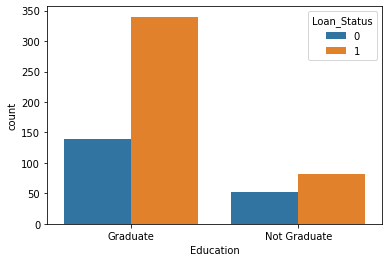

In [12]:
sns.countplot(x="Education", hue="Loan_Status",data=data)

 #  there is high chance of getting loan approved for educational status.

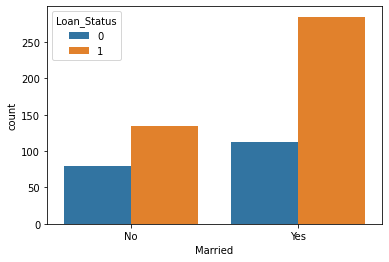

In [13]:
sns.countplot(x="Married", hue="Loan_Status",data=data)

    # most people who got married has high chance of getting loan approved

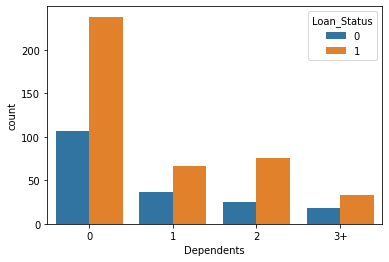

In [14]:
sns.countplot(x="Dependents",hue="Loan_Status",data=data)
       
                 # if Dependents=0 there is high chance of loan approval

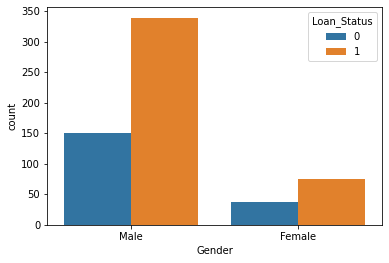

In [15]:
sns.countplot(x="Gender",hue="Loan_Status",data=data)
           
         
        # irrespective of gender both male and female are approved to get loan

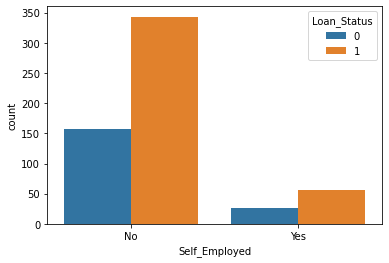

In [16]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=data)

                   
         # there is chance of loan approval 

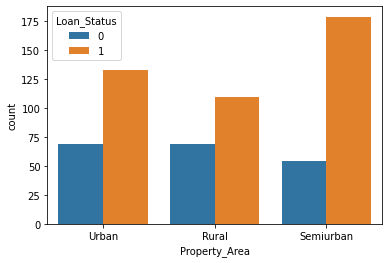

In [17]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=data)


         # people live in semiurban there is high chance of getting loan approvaled
    

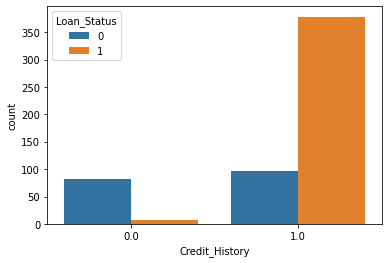

In [18]:
sns.countplot(x="Credit_History", hue="Loan_Status",data=data)



 BOX PLOT REPRESENTATION TO CHECK OUTLIER VALUES OF NUMERIC FEATURES

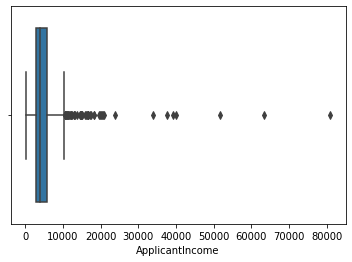

In [19]:
sns.boxplot(data.ApplicantIncome)



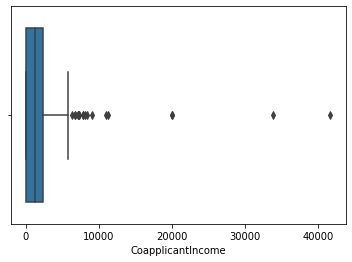

In [20]:
sns.boxplot(data.CoapplicantIncome)



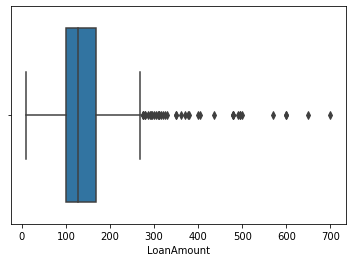

In [21]:
sns.boxplot(data.LoanAmount)


 
 CHECKING CORRELATION BETWEEN NUMERICAL FEATURES

In [22]:
corr=data.corr() 
corr
       
    #taiking co-relation of the data

ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   
Loan_Status              -0.004710          -0.059187   -0.037318   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.045306       -0.014715    -0.004710  
CoapplicantIncome         -0.059878       -0.002056    -0.059187  
LoanAmount                 0.039447       -0.008433    -0.037318  
Loan_Amount_Term           1.000000        0.001470    -0.021268  
Credit_History             0.001470        1.000000     0.561678  
Loan_Status               -0.021268        0.561678     1.000000

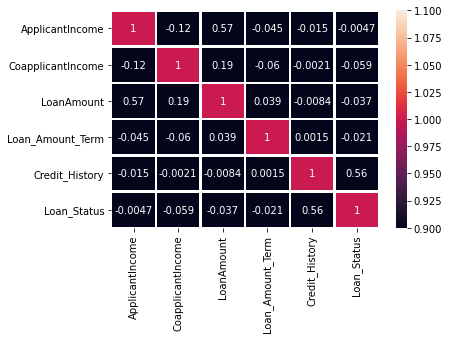

In [23]:
sns.heatmap(corr,vmax=1,vmin=1,annot=True,linewidth=1.5)


         # plotting the values of getting hihg co-relation 

#   Data  Preprocessing Step       

In [24]:
data.isna().sum()

         #Checking the missing value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

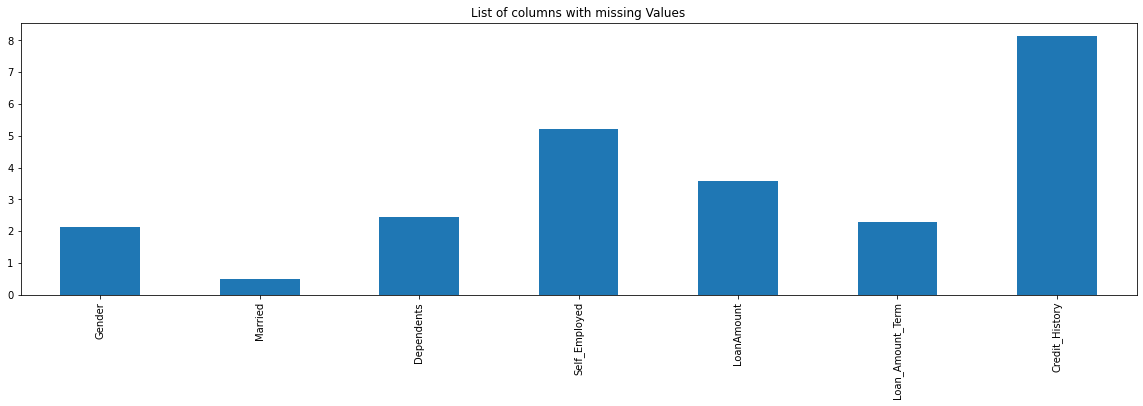

In [25]:
NA_col = data.isna().sum()[data.isna().sum()!=0]*100/data.shape[0]
plt.figure(figsize=(20,5))
NA_col.plot(kind='bar')
plt.title('List of columns with missing Values')
plt.show()
                      # plotting the missing value coloumns

In [26]:
data.isna().sum()[data.isna().sum()!=0]*100/data.shape[0]

           # Considering the percentage of missing values

Gender              2.117264
Married             0.488599
Dependents          2.442997
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
dtype: float64

In [27]:
data1 =data.copy()

        # Taiking a copy of the original da

In [28]:
data = data.drop(['Loan_ID'],axis=1)

           # Dropping a unwanted column 

In [29]:
data.shape


(614, 12)

### converting all features to numerical features using get_dummies()

In [30]:
datanew = pd.get_dummies(data)
datanew

           #taiking the dummy variable and dropping the master columns

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  \
0               1.0            1              0            1           1   
1               1.0            0              0            1           0   
2               1.0            1              0            1           0   
3               1.0            1              0            1           0   
4               1.0            1              0            1           1   
..              ...          ...            ...          ...         ...   
609             1.0            1              1            0           1   
610             1.0            1              0            1           0   
611             1.0            1              0            1           0   
612             1.0            1              0            1           0   
613             0.0            0              1            0           1   

     Married_Yes  ...  Dependents_1  Dependents_2  Dependents_3+  \
0              0  ...             0             0              0   
1              1  ...             1             0              0   
2              1  ...             0             0              0   
3              1  ...             0             0              0   
4              0  ...             0             0              0   
..           ...  ...           ...           ...            ...   
609            0  ...             0             0              0   
610            1  ...             0             0              1   
611            1  ...             1             0              0   
612            1  ...             0             1              0   
613            0  ...             0             0              0   

     Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                     1                       0                 1   
1                     1                       0                 1   
2                     1                       0                 0   
3                     0                       1                 1   
4                     1                       0                 1   
..                  ...                     ...               ...   
609                   1                       0                 1   
610                   1                       0                 1   
611                   1                       0                 1   
612                   1                       0                 1   
613                   1                       0                 0   

     Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                    0                    0                        0   
1                    0                    1                        0   
2                    1                    0                        0   
3                    0                    0                        0   
4                    0                    0                        0   
..                 ...                  ...                      ...   
609                  0                    1                      

In [31]:
datanew.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int64
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Dependents_0                 uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
dtype: object

In [32]:
datanew.isna().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Gender_Female               0
Gender_Male                 0
Married_No                  0
Married_Yes                 0
Dependents_0                0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
dtype: int64

In [33]:
colnames = datanew.columns
colnames

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

## KNN Imputer

In [34]:
from sklearn.impute import KNNImputer

       # after converting to numerical features KNNIMputer algorithm is used to handle missing values.

In [35]:
imputer = KNNImputer(n_neighbors=10)

      #Taiking the 10 values of nearest neighbors

In [36]:
data_filled = imputer.fit_transform(datanew)



In [37]:
type(data_filled)

numpy.ndarray

In [38]:
df = pd.DataFrame(data=data_filled, columns=colnames)

In [39]:
df.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       154.9             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History  Loan_Status  Gender_Female  Gender_Male  Married_No  \
0             1.0          1.0            0.0          1.0         1.0   
1             1.0          0.0            0.0          1.0         0.0   
2             1.0          1.0            0.0          1.0         0.0   
3             1.0          1.0            0.0          1.0         0.0   
4             1.0          1.0            0.0          1.0         1.0   

   Married_Yes  ...  Dependents_1  Dependents_2  Dependents_3+  \
0          0.0  ...           0.0           0.0            0.0   
1          1.0  ...           1.0           0.0            0.0   
2          1.0  ...           0.0           0.0            0.0   
3          1.0  ...           0.0           0.0            0.0   
4          0.0  ...           0.0           0.0            0.0   

   Education_Graduate  Education_Not Graduate  Self_Employed_No  \
0                 1.0                     0.0               1.0   
1                 1.0                     0.0               1.0   
2                 1.0                     0.0               0.0   
3                 0.0                     1.0               1.0   
4                 1.0                     0.0               1.0   

   Self_Employed_Yes  Property_Area_Rural  Property_Area_Semiurban  \
0                0.0                  0.0                      0.0   
1                0.0                  1.0                      0.0   
2                1.0                  0.0                      0.0   
3                0.0                  0.0                      0.0   
4                0.0                  0.0                      0.0   

   Property_Area_Urban  
0                  1.0  
1                  0.0  
2                  1.0  
3                  1.0  
4                  1.0  

[5 rows x 21 columns]

In [40]:
df.isna().sum()

    #Filling the null values with KNN Imputer 

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [41]:
import math
math.sqrt(df.shape[0])

24.779023386727733

### Splitting data into x and y for training testing and modeling.
 
 * Test data is used to test/evaluate the model
 * Train data is used for training the model 
  

 

In [42]:
X = df.drop("Loan_Status",axis=1)
Y = df["Loan_Status"]


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=42)

#                          Logistic  Regression

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

          #command for training / fitting the model

LogisticRegression()

In [45]:
ypred = classifier.predict(X_test)
ypred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.])

In [46]:
Y_test

350    1.0
377    1.0
163    1.0
609    1.0
132    1.0
      ... 
280    0.0
195    0.0
613    0.0
495    1.0
451    1.0
Name: Loan_Status, Length: 203, dtype: float64

### confusion matrix

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,ypred)


array([[ 29,  43],
       [  2, 129]])

### Accuracy

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,ypred)*100


77.83251231527095

In [49]:
from sklearn.metrics import mean_squared_error #calculating MSE

MSE=mean_squared_error(ypred,Y_test)*100
print("MSE:",MSE)

MSE: 22.167487684729064
